<IPython.core.display.Javascript object>


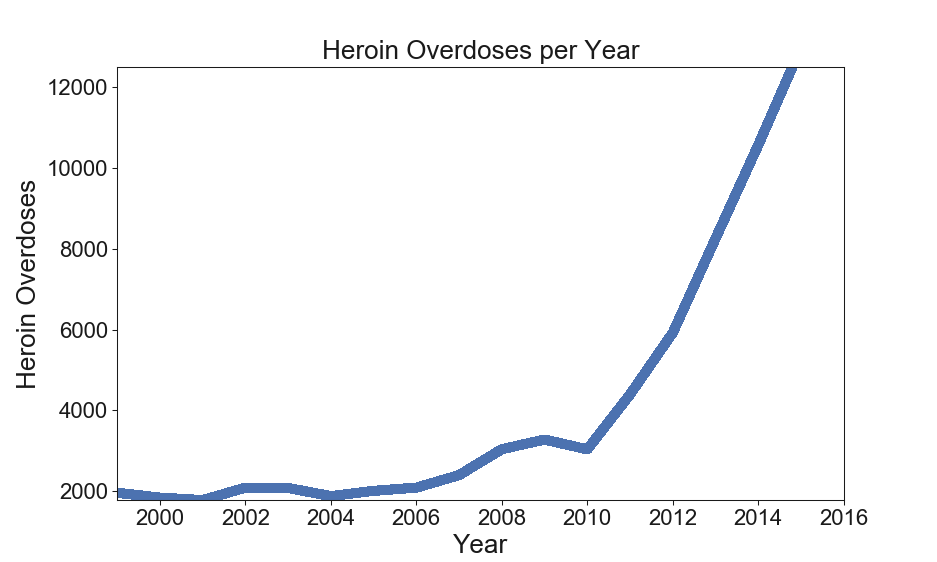

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew



%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
# overdose = pd.DataFrame(y,x)
XN,YN = augment(x,y,5)
overdose = pd.DataFrame(YN,XN)
overdose.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range  
    sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey','figure.edgecolor':'black','axes.grid':False})
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="b")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=160, repeat=True)
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)